# Project: Visualizing Data with Matplotlib (Gender Gap)

## Questions to address:
- Look at the gender balance in different academic degrees in the US
- Can we understand why the relative numbers of Men and Women evolved so differently in different areas?

<br>

## Tools:
- lineplots for multiple subplots
- focus on Clarity and Aesthetics

<br>

### load defaults

In [2]:
import pandas as pd
import re
import numpy as np

from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams

from functions import *

plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green']

<br>

## Dataset: Evolution of the Fraction of Women in Different Degrees in US Universities

In [3]:
women_degrees = pd.read_csv('./data/percent-bachelors-degrees-women-usa.csv')
display(women_degrees.iloc[:5,:10])

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2


<br>

## Analysis:

<br>

### Q1: Evolution of the Gender Balance in STEM fields

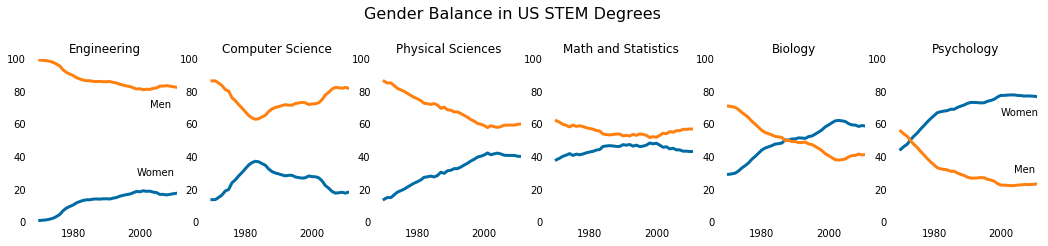

In [56]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Physical Sciences', 'Math and Statistics', 'Biology', 'Psychology']

fig = plt.figure(figsize=(18,3))

for sp, element in enumerate(stem_cats):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[element], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[element], label='Men', c=cb_orange, linewidth=3)
    
    #axis mods
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(left=False, right=False, top=False, bottom=False)
    ax.set_xlim(1968, 2011); ax.set_ylim(0,100)
    ax.set_title(element)
            
    #Anotations
    if(sp==0):
        ax.text(2003, 70, 'Men')
        ax.text(1999, 28, 'Women')
    elif(sp==5):
        ax.text(2000, 65, 'Women')
        ax.text(2004, 30, 'Men')
        
    
#fig.suptitle("Gender", fontsize=16)   
fig.suptitle("Gender Balance in US STEM Degrees", x=0.38, y=1.12, horizontalalignment='left', verticalalignment='top', fontsize = 16)    

plt.show()

<br>

- There was a significant gender in-balance in most fields in the 70's. 
- Men continue to predominate in Engineering and Computer Science while Women predominate in Psycology. 
- Physical Siences have a 60% Men and 40% Women while the reverse is true for Biology. 
- The numbers of Men and Women have been relatively constant and similar over the years in Math and Statistics. 

<br>

### Q2: Evolution of the Gender Balance in all fields

We will now look at the 17 degrees available (using a subplot grid layout of 6 rows by 3 columns) while <b>grouping the degrees into STEM, liberal arts, and other</b>.

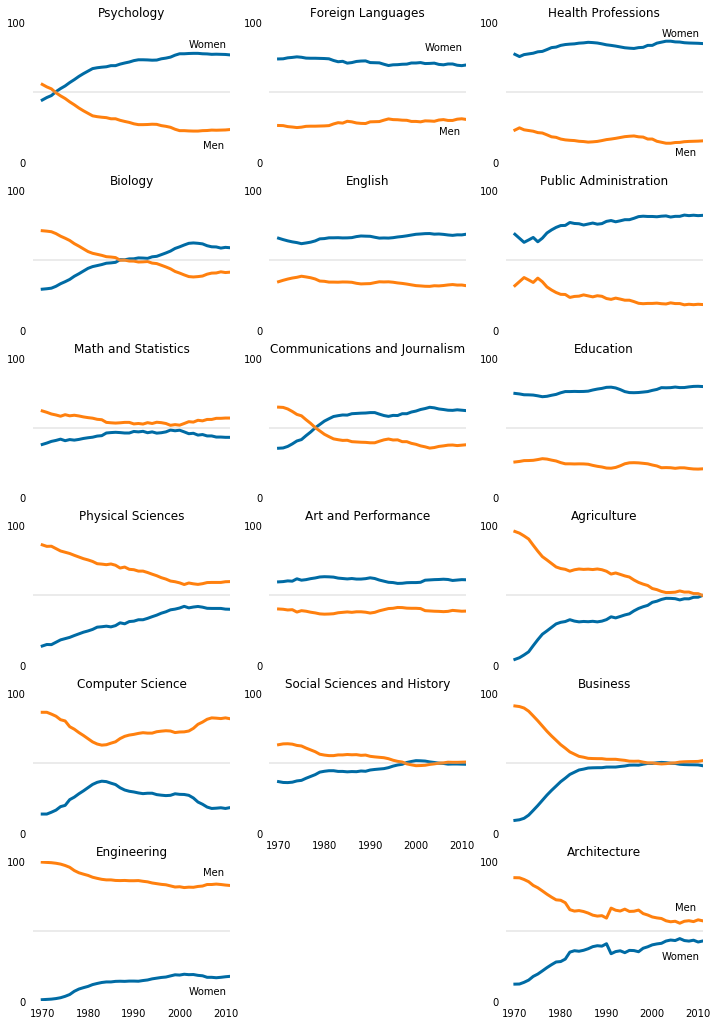

In [55]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_grey = (171/255, 171/255, 171/255)

fig = plt.figure(figsize=(12,18))

def make_degree_plot(ax, women_degrees, sp, element):    
    ax.plot(women_degrees['Year'], women_degrees[element], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[element], label='Men', c=cb_orange, linewidth=3)
    
    #axis mods
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    #labelbottom='off' - removes the labels from the ticks
    ax.tick_params(left=False, right=False, top=False, bottom=False, labelbottom=False)
    ax.set_xlim(1968, 2011); ax.set_ylim(0,100)
    ax.set_title(element)
    #Axes.set_yticks() specifies which labels to display
    ax.set_yticks([0,100])
    #Axes.axhline() creates an horizontal line
    ax.axhline(50, c=cb_grey, alpha=0.3)    
    
        
    #Anotations
    if(element == 'Psychology'):   
        ax.text(2005, 10, 'Men')
        ax.text(2002, 82, 'Women')
    elif(element == 'Engineering'):
        ax.text(2005, 90, 'Men')
        ax.text(2002, 5, 'Women')
        
    elif(element == 'Foreign Languages'):
        ax.text(2005, 20, 'Men')
        ax.text(2002, 80, 'Women')
        
    elif(element == 'Health Professions'):
        ax.text(2005, 5, 'Men')
        ax.text(2002, 90, 'Women')
    elif(element == 'Architecture'):
        ax.text(2005, 65, 'Men')
        ax.text(2002, 30, 'Women')

for sp, element in enumerate(stem_cats):
    ax = fig.add_subplot(6,3,sp*3+1)   
    make_degree_plot(ax, women_degrees, sp, element)
ax.tick_params(labelbottom=True)    
  
for sp, element in enumerate(lib_arts_cats):
    ax = fig.add_subplot(6,3,sp*3+2)
    make_degree_plot(ax, women_degrees, sp, element)
ax.tick_params(labelbottom=True)

for sp, element in enumerate(other_cats):
    ax = fig.add_subplot(6,3,sp*3+3)
    make_degree_plot(ax, women_degrees, sp, element)
ax.tick_params(labelbottom=True)
        
plt.show()

fig.savefig("fig_project051_gender_gap.pdf")

<br>

- Social Sciences and History and Business have the same number of Men and Women 
- Women dominate the majority of the degrees in the dataset
- Man strongly dominate in Computer Science and Engineering